In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.likelihood import LikelihoodClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


%load_ext autoreload
%autoreload 2

In [2]:
# Path
data_path = os.path.relpath('../data/FR_2007')

# Load data from a JSONL file
market = Market.loader('2007/09/01','2007/09/10', data_path)

# Sampled Market
#market = market.sample(1000)

100%|██████████| 46/46 [03:01<00:00,  3.95s/it]


In [3]:
# Get periods of length 15
periods = market.get_periods(period_length=3600)
print(f"Number of periods: {len(periods)}")

100%|██████████| 2184794/2184794 [00:07<00:00, 293681.04it/s]


Number of periods: 39


In [4]:
clustering = LikelihoodClustering().fit(periods, generations=3, mutation_rate=0.1, num_clusters=10)

print('-' * 50)
clustering.summarize_clusters()
print('-' * 50)

Solving with PGA...: 100%|██████████| 3/3 [00:12<00:00,  4.33s/it]

Best solution : [0, 2, 9, 0, 6, 8, 0, 0, 0, 4, 5, 4, 5, 7, 1, 3, 7, 5, 8, 9, 8, 9, 6, 7, 3, 4, 0, 4, 4, 8, 8, 1, 4, 5, 8, 2, 0, 1]
Best score : 0.4407
--------------------------------------------------
Number of periods: 38
Number of clusters: 10
Cluster sizes: [7, 3, 2, 2, 6, 4, 2, 3, 6, 3]
Cluster labels: [0, 2, 9, 0, 6, 8, 0, 0, 0, 4, 5, 4, 5, 7, 1, 3, 7, 5, 8, 9, 8, 9, 6, 7, 3, 4, 0, 4, 4, 8, 8, 1, 4, 5, 8, 2, 0, 1]
Transition matrix: 
[[0.28571429 0.14285714 0.14285714 0.         0.28571429 0.
  0.14285714 0.         0.         0.        ]
 [0.         0.33333333 0.         0.33333333 0.33333333 0.
  0.         0.         0.         0.        ]
 [0.5        0.         0.         0.         0.         0.
  0.         0.         0.         0.5       ]
 [0.         0.         0.         0.         0.5        0.
  0.         0.5        0.         0.        ]
 [0.16666667 0.         0.         0.         0.16666667 0.5
  0.         0.         0.16666667 0.        ]
 [0.         0.     

Count of periods per time:
08:00 : 4
09:00 : 4
10:00 : 5
11:00 : 5
12:00 : 5
13:00 : 5
14:00 : 5
15:00 : 5


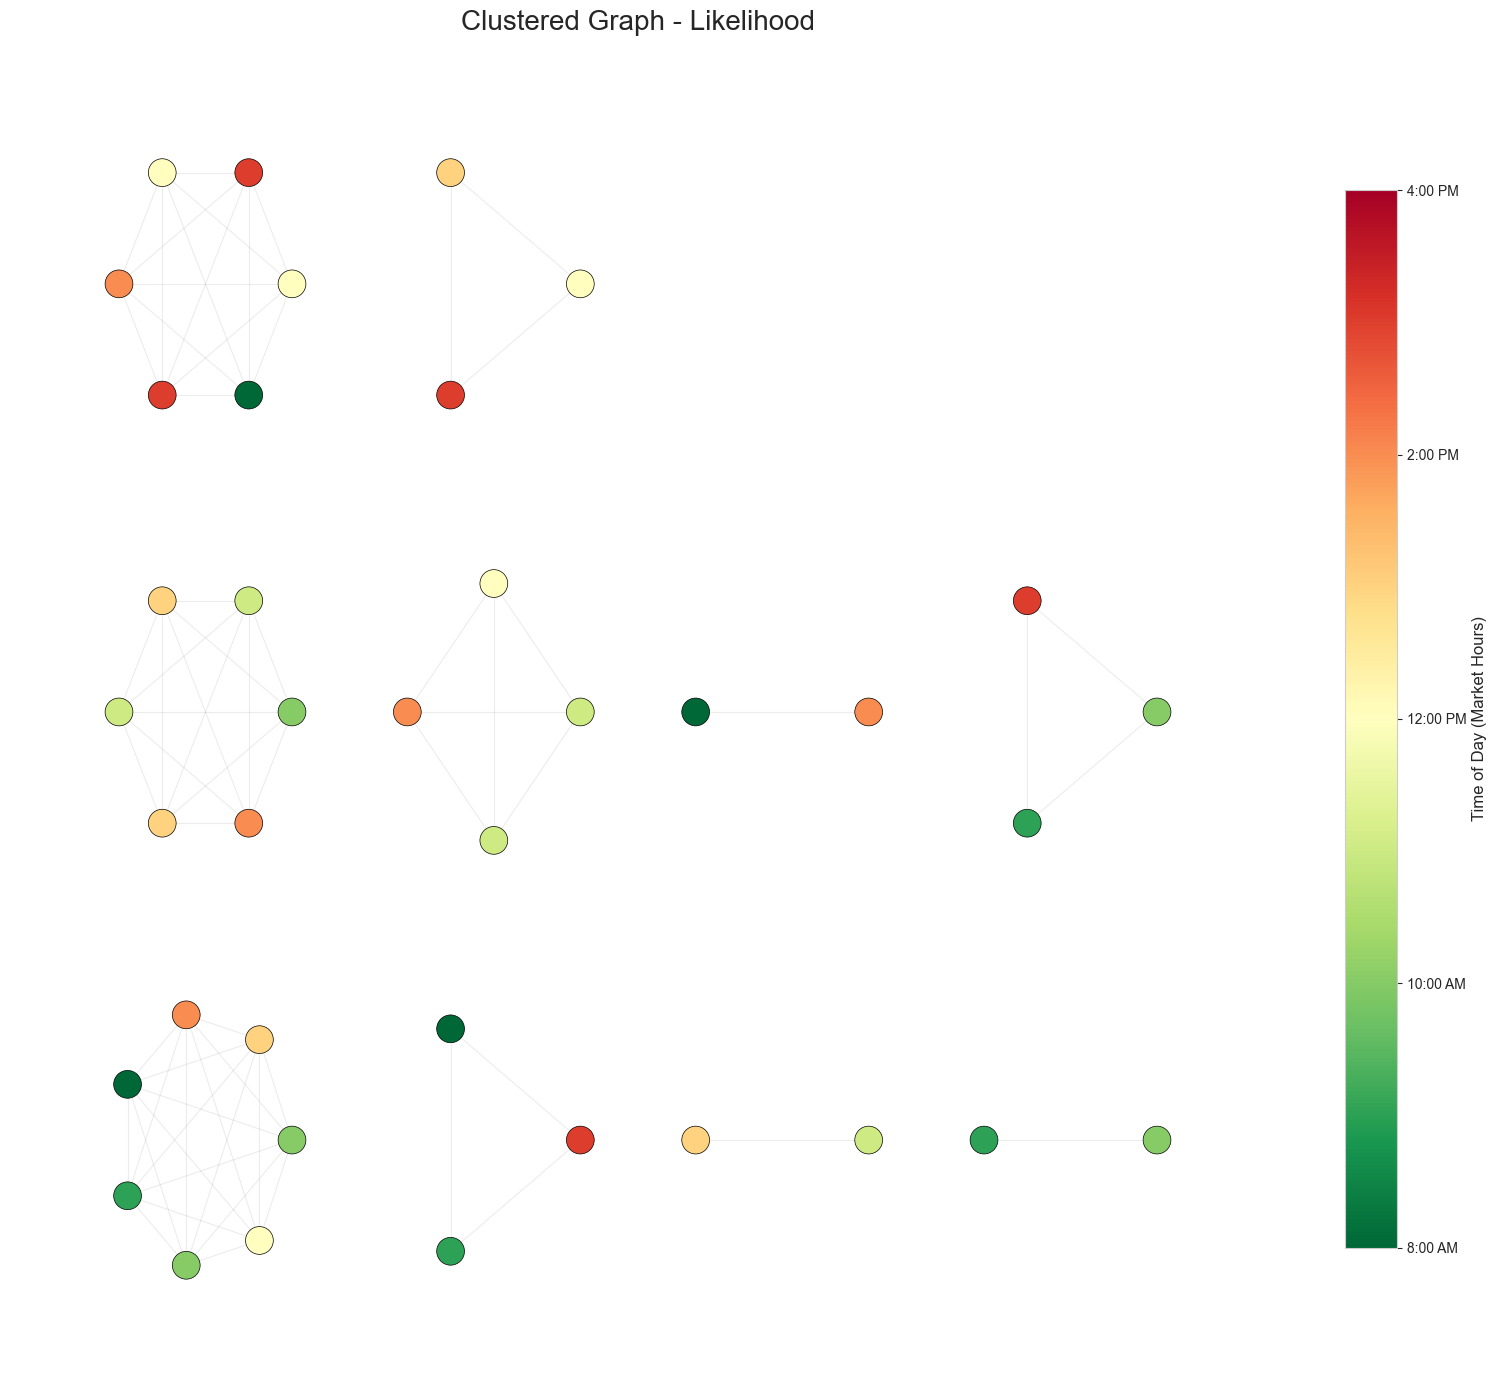

In [5]:
clustering.plot_community_graph(method='Likelihood', path='../figures/likelihood_graph.png')

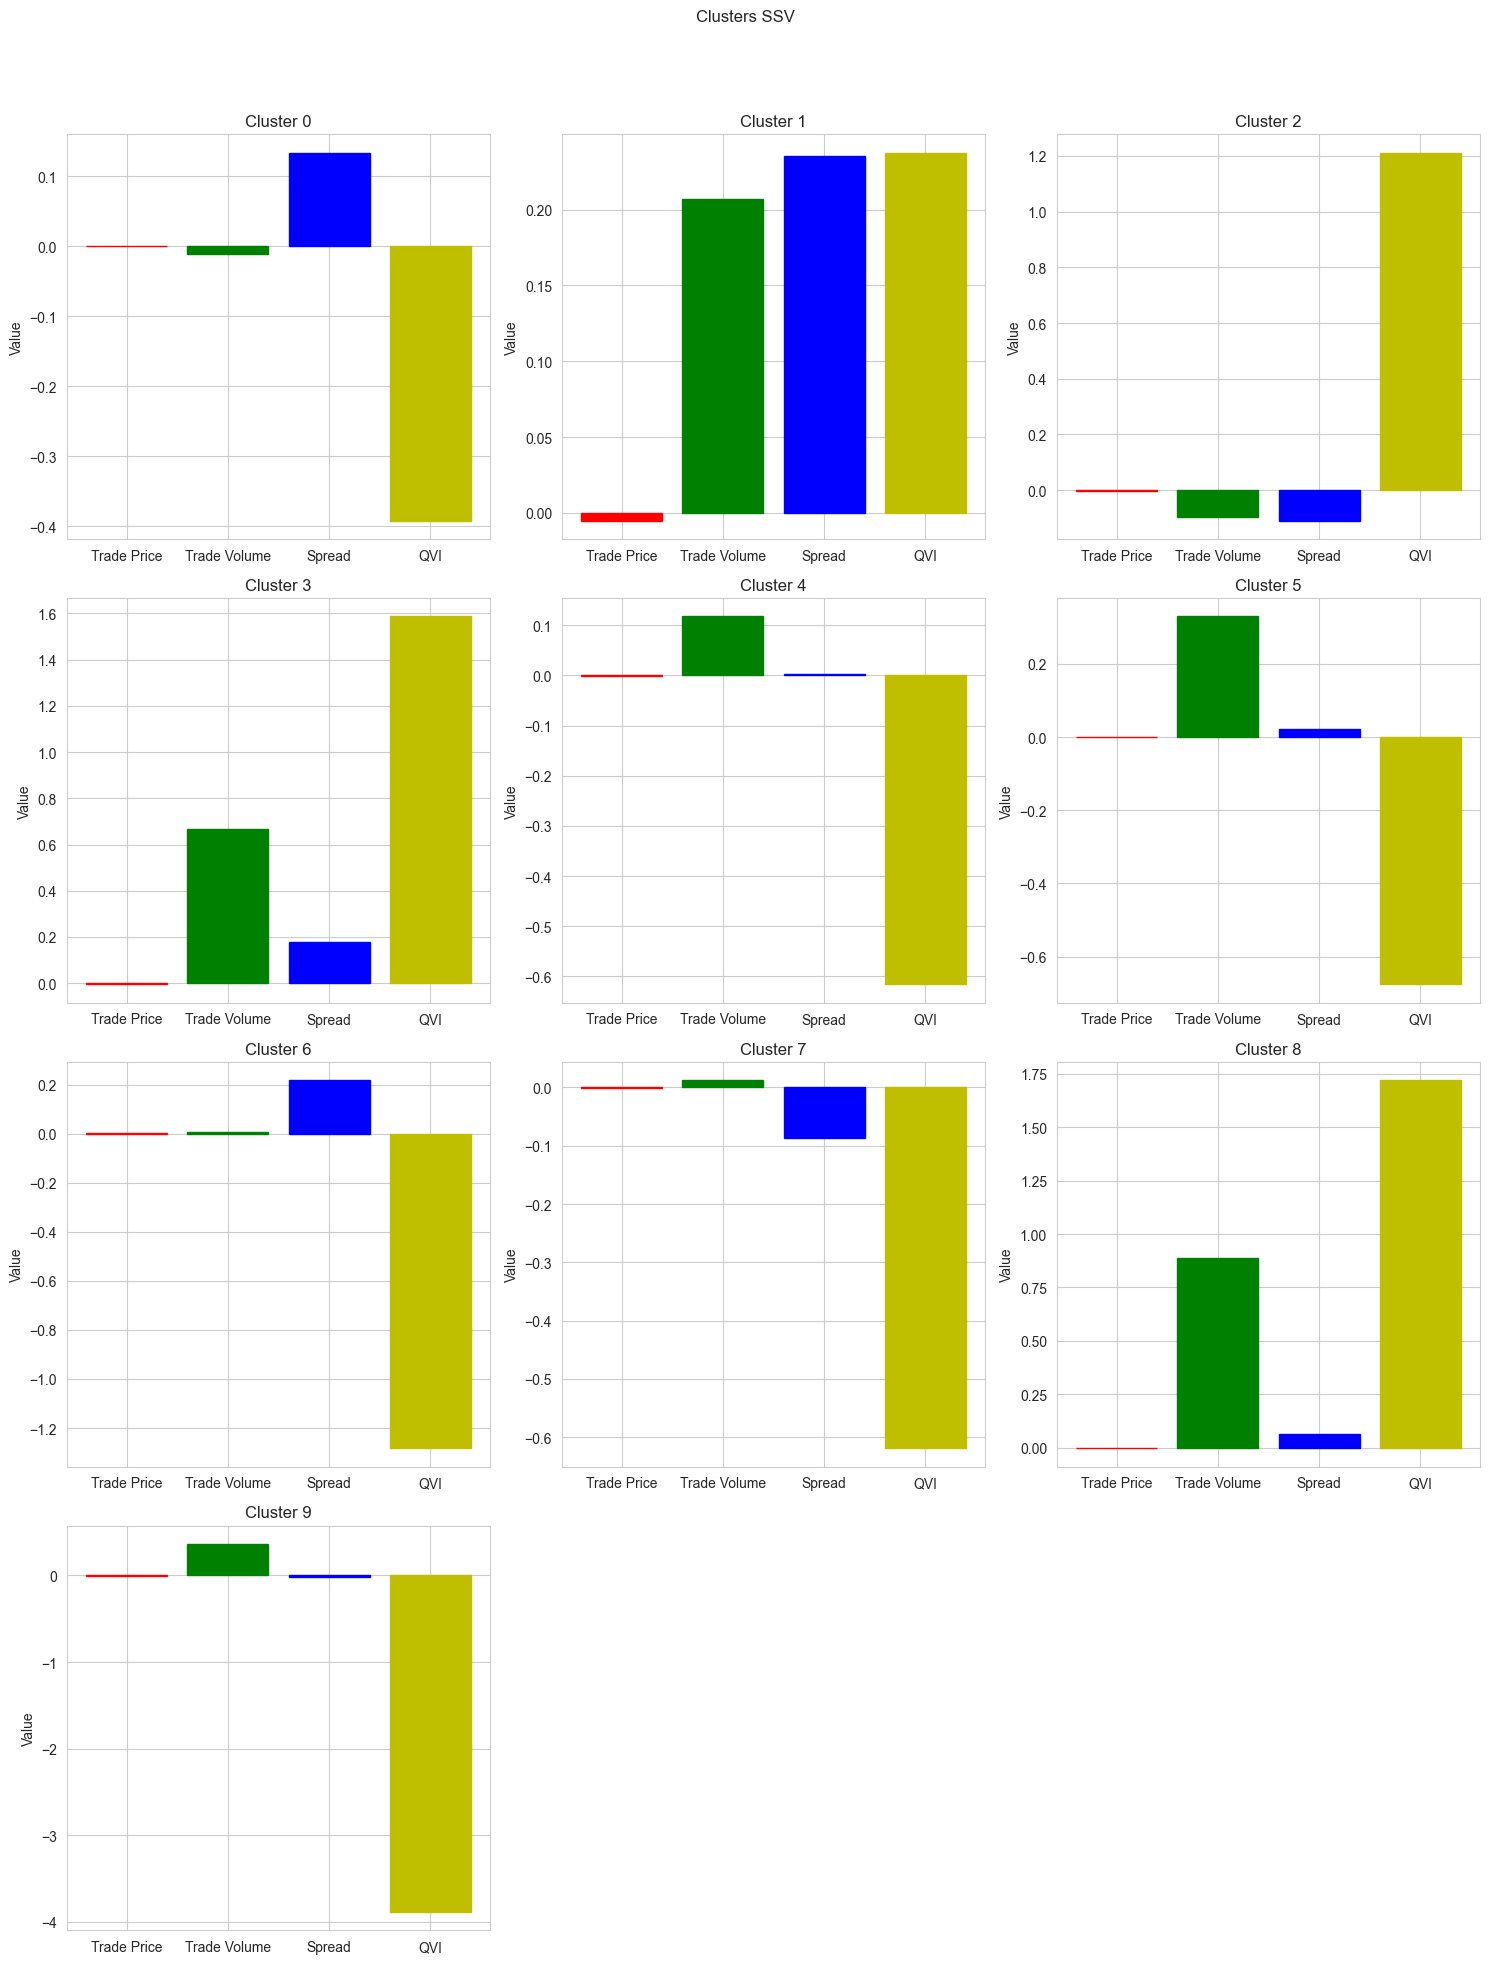

In [7]:
clustering.plot_ssv(path='../figures/likelihood_ssv.png')

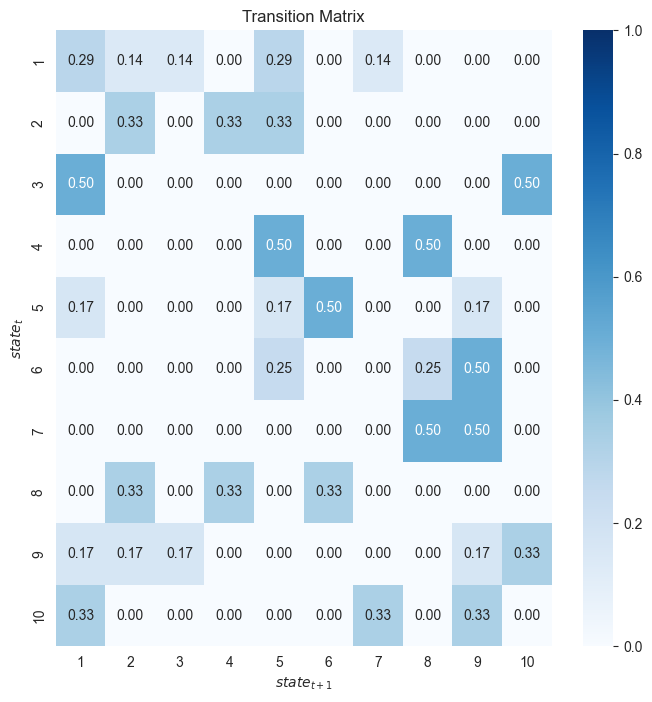

In [8]:
clustering.plot_transition_matrix(path='../figures/likelihood_transition_matrix.png')

Calculating best minimal value for power law fit
Estimated alpha: 2.8658352328230743
Estimated x_min: 2
P-value: 0.7655531372732602


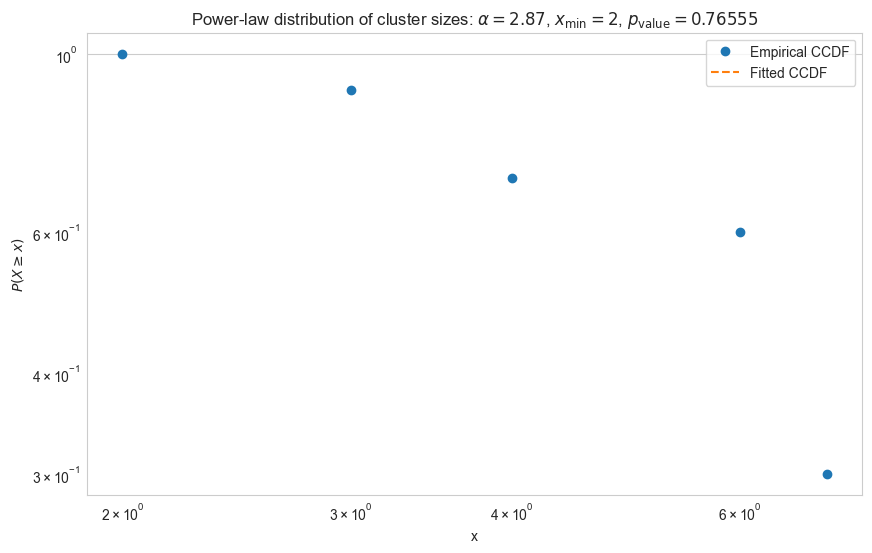

In [65]:
clustering.plot_power_law(path='../figures/likelihood_power_law.png')